In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datapackage 

In [2]:
dataset = pd.read_csv('Data/co2-annmean-mlo_csv.csv', parse_dates=['Year'])
date = dataset["Year"]
means = dataset.iloc[:, 1].values

In [4]:
year_ppm=[]
for i in range(len(date)):
    year_ppm.append(date[i].year)
    
print(year_ppm)

[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


Text(0, 0.5, 'CO2 Level in ppm')

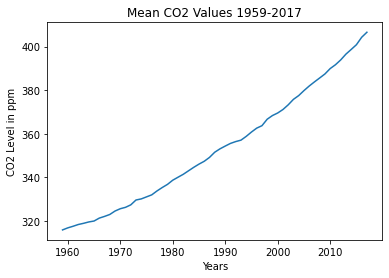

In [5]:
plt.plot(year_ppm, means)
plt.title("Mean CO2 Values 1959-2017")
plt.xlabel("Years")
plt.ylabel("CO2 Level in ppm")


In [8]:
dataset = pd.read_csv('Data/co2-gr-mlo_csv.csv', parse_dates=['Year'])
date = dataset["Year"]
increase = dataset.iloc[:, 1].values

In [9]:
year_inc=[]
for i in range(len(date)):
    year_inc.append(date[i].year)
    
print(year_inc)

[1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


Text(0, 0.5, 'CO2 Level Increase in ppm')

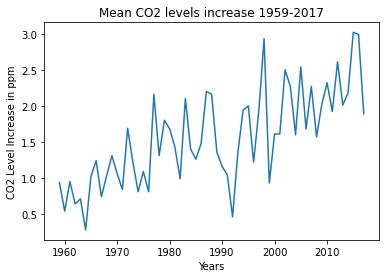

In [10]:
plt.plot(year_inc, increase)
plt.title("Mean CO2 levels increase 1959-2017")
plt.xlabel("Years")
plt.ylabel("CO2 Level Increase in ppm")


In [11]:
data_url = 'https://datahub.io/core/co2-fossil-by-nation/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

In [14]:
print(data)

       Year                    Country  Total  Solid Fuel  Liquid Fuel  \
0      1751             UNITED KINGDOM   2552        2552            0   
1      1752             UNITED KINGDOM   2553        2553            0   
2      1753             UNITED KINGDOM   2553        2553            0   
3      1754             UNITED KINGDOM   2554        2554            0   
4      1755             UNITED KINGDOM   2555        2555            0   
...     ...                        ...    ...         ...          ...   
17227  2014                   VIET NAM  45517       19246        12694   
17228  2014  WALLIS AND FUTUNA ISLANDS      6           0            6   
17229  2014                      YEMEN   6190         137         5090   
17230  2014                     ZAMBIA   1228         132          797   
17231  2014                   ZIMBABWE   3278        2097         1005   

       Gas Fuel  Cement  Gas Flaring  Per Capita  Bunker fuels (Not in Total)  
0             0       0        

In [12]:
print(data.columns)

Index(['Year', 'Country', 'Total', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel',
       'Cement', 'Gas Flaring', 'Per Capita', 'Bunker fuels (Not in Total)'],
      dtype='object')


In [13]:
unique_countries = list(set(data["Country"])) 

In [14]:
total = data.iloc[:, 2].values
countries = data["Country"]
tot_per_country = []
temp = 0

for i in range(len(unique_countries)):
    for j in range(len(countries)):
        if (unique_countries[i] == countries[j]):
            temp += total[j]
    tot_per_country.append(temp)
    temp = 0



In [15]:
dic_countries = dict(zip(unique_countries,tot_per_country))
sorted_dic = sorted(dic_countries.items(), key=lambda x: x[1], reverse=True)
c=[]
t=[]
for i in range(10):
    c.append(sorted_dic[i][0])
    t.append( (sorted_dic[i][1] /1000000))

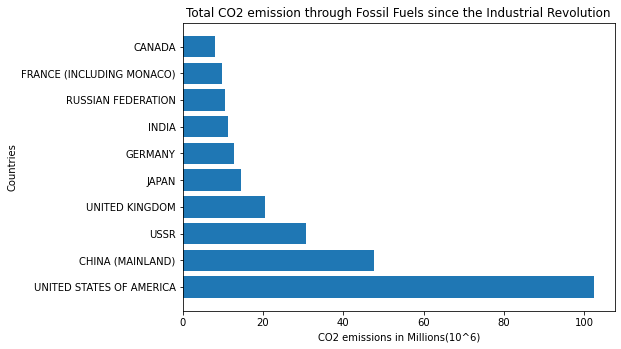

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(c,t)
ax.set_xlabel('CO2 emissions in Millions(10^6)')
ax.set_ylabel('Countries')
ax.set_title('Total CO2 emission through Fossil Fuels since the Industrial Revolution')
plt.show()

In [18]:
dataset_2 = pd.read_csv('Data/Seasonal_Annual.csv', parse_dates=['YEAR'])
date_2 = dataset_2["YEAR"]
annu = dataset_2.iloc[:, 1].values
print(annu)


[24.23 24.33 23.8  23.86 23.71 24.12 23.87 23.95 23.78 23.77 23.96 24.11
 23.88 24.03 24.29 24.08 23.56 23.83 24.01 23.91 24.33 24.05 24.05 24.15
 23.95 24.04 23.94 24.29 24.08 23.93 24.44 24.21 23.92 24.13 23.98 24.12
 23.98 23.98 24.01 24.06 24.65 24.22 23.93 24.03 23.92 24.42 24.04 24.11
 24.08 23.71 24.22 24.34 24.57 24.13 23.97 23.96 23.97 24.62 24.3  24.29
 24.   24.04 24.15 24.1  24.07 24.36 24.11 23.94 24.46 24.26 23.91 24.1
 24.41 24.   23.74 24.07 24.35 24.24 24.57 24.55 24.27 24.15 24.12 24.26
 24.45 24.2  24.57 24.42 24.03 24.21 24.28 24.15 24.43 24.46 25.29 24.55
 24.1  24.76 24.67 24.6  24.73 25.   24.72 24.74 24.58 25.06 24.77 24.61
 25.11 25.13 24.67 24.69 24.82 24.73 24.91 26.45 26.29]


In [19]:
year_temp=[]
for i in range(len(date_2)):
    year_temp.append(date_2[i].year) 
year_temp = np.array(year_temp)
year_temp = year_temp.reshape(-1, 1)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(year_temp,annu,test_size=0.2,random_state=10)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
year_temp_poly = poly_reg.fit_transform(year_temp)
poly_reg.fit(year_temp_poly, annu)

PolynomialFeatures(degree=3)

In [22]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(year_temp_poly, annu)

LinearRegression()

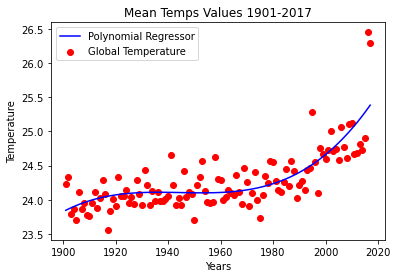

In [23]:
plt.scatter(year_temp, annu, color = 'red',label="Global Temperature")
plt.plot(year_temp, lin_reg_2.predict(poly_reg.fit_transform(year_temp)), color = 'blue',label="Polynomial Regressor")
plt.title("Mean Temps Values 1901-2017")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.show()

In [24]:
z = lin_reg_2.predict(poly_reg.fit_transform(year_temp))

from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is ",round(mean_squared_error(annu, z),4))

#Mean Square Error

The Mean Squared Error is  0.0689


In [25]:
print(lin_reg_2.predict(poly_reg.fit_transform([[2020]])))
print(dataset_2.loc[len(dataset_2)-1,"ANNUAL"])

[25.55395511]
26.29
